# Data Summary

This is the summary of sale data, generated in 1000 datas using 3rd party. 
The datas were in JSON format, consist of "Barang", "Kategori", "harga", "alamat", "Timestamp", "kuantitas", "tanggal lahir", "total harga".

This part summarize:
1. Category of Sales 
2. Favourite items (ranked)
3. Mean sale per items
4. Mean gross sale per items
5. Largest gross sale per items (ranked)
6. Customer target (age distribution of customers per item)
7. Customer's city distribution (ranked)

In [16]:
import flask
import json
from flask import request, jsonify
import pandas as pd 
import io
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [17]:
#buat bikin endpoint pake flask, isinya json
app = flask.Flask(__name__)
app.config["DEBUG"] = True

url = 'http://127.0.0.1:5000/api/carsale.json' 
df=pd.read_json(url,orient='columns')
df.to_csv("data.csv")

In [18]:
# Create some test data for our catalog in the form of a list of dictionaries.
#with open('http://127.0.0.1:5000/api/v1/resources/books/all', 'r') as f:
#    data = json.load(f)

#summary 10 data pertama, tes
df.head(10)

,,Barang,Column1,Kategori,Timestamp,alamat,harga,id,kota,kuantitas,tanggal lahir,total harga
0,0,Allroad,215,Motor,2018-06-24,36351 Morning Trail,9420977.410,216,Zlehridge,6,3/7/1987,56525864.460
1,1,Allroad,246,Motor,2018-06-24,969 Quincy Park,9420977.410,247,Nouta,6,9/14/1997,56525864.460
2,2,Thunderbird,908,Pesawat,2018-06-24,75714 Kings Center,8374518.590,909,Yroikbury,1,8/15/1991,8374518.590
3,3,Tribeca,999,Pesawat,2018-06-24,203 Golf View Lane,1454086.140,1000,Gamery,6,4/13/1989,8724516.840
4,4,X5 M,143,Motor,2018-06-25,83186 Nancy Avenue,1492756.190,144,Xuodiff,6,7/30/1984,8956537.140
5,5,Accord,451,Mesin,2018-06-25,22313 Surrey Plaza,9128316.050,452,Sheles,5,9/27/1990,45641580.250
6,6,Thunderbird,965,Pesawat,2018-06-25,13 Erie Circle,8374518.590,966,Strale,9,12/13/1984,75370667.310
7,7,Omni,87,Mobil,2018-06-27,4 Kennedy Drive,6902335.510,88,Zlehridge,8,6/26/1996,55218684.080
8,8,Accord,520,Mesin,2018-06-27,76126 Butterfield Place,9128316.050,521,Nouta,9,10/23/1981,82154844.450
9,9,Thunderbird,925,Pesawat,2018-06-27,6 Melby Pass,8374518.590,926,Zlehridge,6,8/3/1987,50247111.540


In [19]:
df.describe()
df.columns

Index(['', 'Barang', 'Column1', 'Kategori', 'Timestamp', 'alamat', 'harga',
       'id', 'kota', 'kuantitas', 'tanggal lahir', 'total harga'],
      dtype='object')

In [20]:
kategori = df['Kategori'].astype('category')
count_kategori = kategori.value_counts()


In [21]:
count_kategori = kategori.value_counts()
#count_kategori.plot(kind='hist', x = df["Kategori"], y = count_kategori)

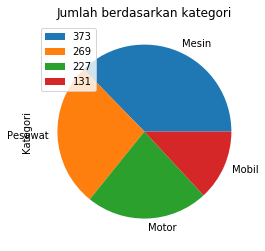

In [22]:
kategori.value_counts().plot(kind="pie")
plt.title('Jumlah berdasarkan kategori')
plt.legend(labels =kategori.value_counts(),loc='upper left')

In [23]:
barang = df["Barang"]
count_barang = barang.value_counts()

In [24]:
#Barang favorit
print("Barang favorit\n")
print(count_barang)


Barang favorit

Thunderbird    246
Aerostar       184
Accord         125
G8a             93
Titan           64
SLR McLaren     44
Allroad         41
X5 M            40
Rodeo           34
Omni            33
Tribeca         23
Aries           19
Caravan         17
Mark LT         15
Corolla         13
Fiesta           9
Name: Barang, dtype: int64


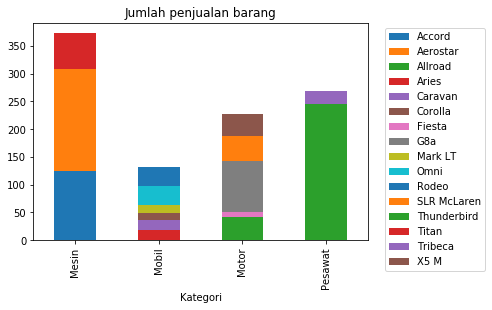

In [25]:
df.groupby(["Kategori","Barang"]).size().unstack().plot(kind="bar",stacked = True)
plt.title("Jumlah penjualan barang")
plt.legend(loc="upper center",bbox_to_anchor=(1.2, 1))

In [26]:
x = df["Barang"]
y = df["total harga"]

In [27]:
print('deskripsi kolom barang')
x.describe()

deskripsi kolom barang


count            1000
unique             16
top       Thunderbird
freq              246
Name: Barang, dtype: object

In [28]:
print('deskripsi kolom total harga')
y.describe()

deskripsi kolom total harga


count       1000.000
mean    33077490.074
std     24009920.396
min      1365370.480
25%      9128441.050
50%     27927431.585
75%     53293367.790
max     84788796.690
Name: total harga, dtype: float64

In [29]:
#rata-rata pembelian

df.groupby('Barang').mean()[['kuantitas']]

,kuantitas
Barang,
Accord,4.520
Aerostar,4.310
Allroad,4.976
Aries,4.000
Caravan,4.588
Corolla,4.538
Fiesta,5.778
G8a,4.849
Mark LT,3.933


In [30]:
#rata-rata laba kotor
print('Laba kotor rata-rata')
df.groupby('Barang', as_index=False)['total harga'].mean()


Laba kotor rata-rata


,Barang,total harga
0,Accord,41259988.546
1,Aerostar,39341596.482
2,Allroad,46875107.113
3,Aries,24494730.200
4,Caravan,28096896.406
5,Corolla,42730403.761
6,Fiesta,17506697.867
7,G8a,6621312.758
8,Mark LT,25808845.737
9,Omni,38276587.828


In [31]:
#laba kotor maksimum
print('Laba Kotor (descending)')
sumdata = df.groupby('Barang', as_index=False)['total harga'].sum()
sumdata.sort_values(["total harga"], ascending=[0])

Laba Kotor (descending)


,Barang,total harga
12,Thunderbird,9680943490.040
1,Aerostar,7238853752.650
0,Accord,5157498568.250
13,Titan,2393080787.500
2,Allroad,1921879391.640
9,Omni,1263127398.330
10,Rodeo,1194859281.000
11,SLR McLaren,1125082208.900
7,G8a,615782086.480
5,Corolla,555495248.890


Text(0.5, 1.0, 'Distribusi tahun lahir customer')

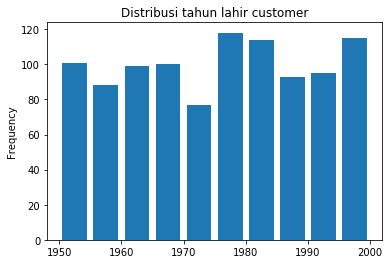

In [32]:
df["tanggal lahir"] = df["tanggal lahir"].astype("datetime64")
tahun_lahir = df["tanggal lahir"].dt.year
count_tahunlahir = (df["tanggal lahir"].dt.year.value_counts ())
tahun_lahir.plot(kind='hist',rwidth =0.8)
plt.title('Distribusi tahun lahir customer')

In [33]:
#hitung umur pembeli per barang yang dibeli
item = df["Barang"]
age = 2019-tahun_lahir

In [34]:
#buat dataframe
item_age = pd.DataFrame({'Barang':item, 'Umur':age})

In [35]:
print('Rata-rata umur untuk setiap barang')
agedata = item_age.groupby('Barang', as_index=False)['Umur'].mean()
agedata.sort_values(["Umur"], ascending=[0])

Rata-rata umur untuk setiap barang


,Barang,Umur
6,Fiesta,53.333
15,X5 M,50.375
9,Omni,47.394
10,Rodeo,46.294
5,Corolla,45.769
13,Titan,45.203
7,G8a,44.183
0,Accord,44.160
12,Thunderbird,43.955
1,Aerostar,42.701


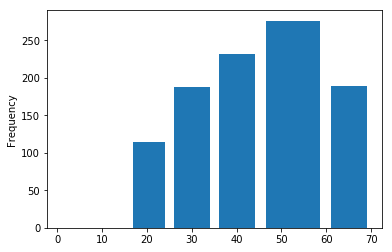

In [36]:
item_age["Umur"].plot(kind='hist', bins=[0,12,16,25,35,45,60,70],rwidth = 0.8)

In [37]:
#item_age.groupby('Barang', as_index=False)['Umur'].plot(kind='hist', bins=[0,12,16,25,35,45,60,70],rwidth = 0.8)
#plt.legend()
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 9
#fig_size[1] = 7

In [38]:
item_age.describe()
dat = agedata.sort_values(["Umur"], ascending=[0])
dat["Barang"]

6          Fiesta
15           X5 M
9            Omni
10          Rodeo
5         Corolla
13          Titan
7             G8a
0          Accord
12    Thunderbird
1        Aerostar
11    SLR McLaren
2         Allroad
8         Mark LT
4         Caravan
3           Aries
14        Tribeca
Name: Barang, dtype: object

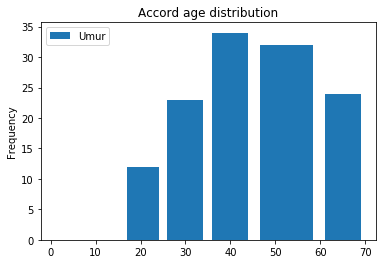

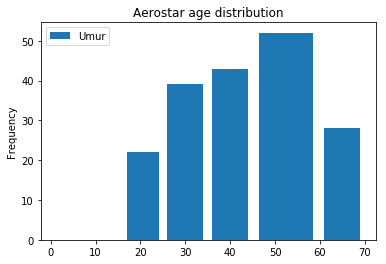

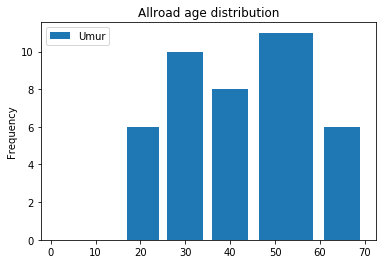

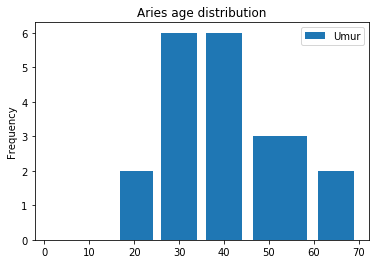

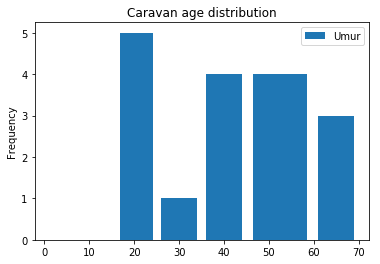

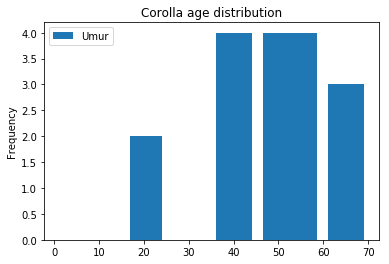

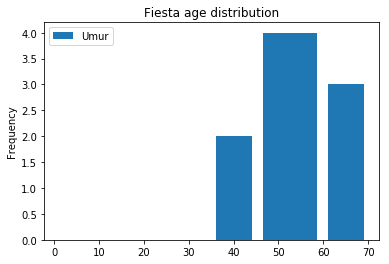

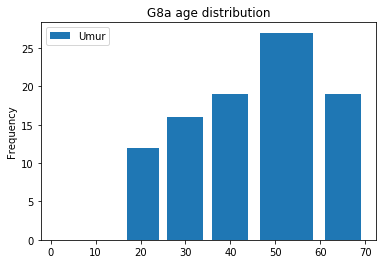

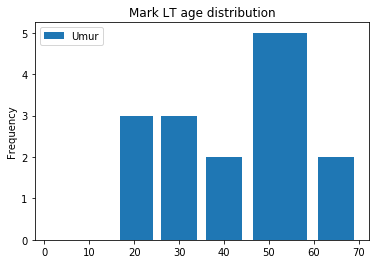

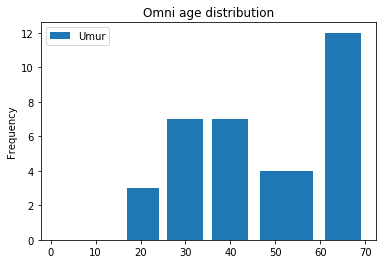

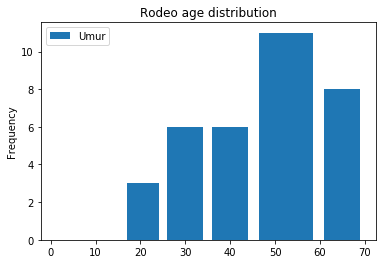

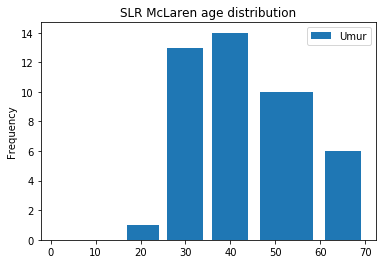

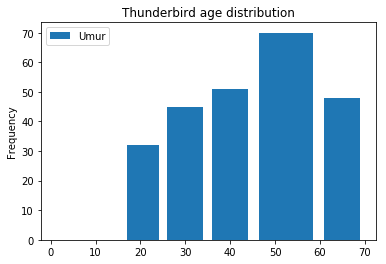

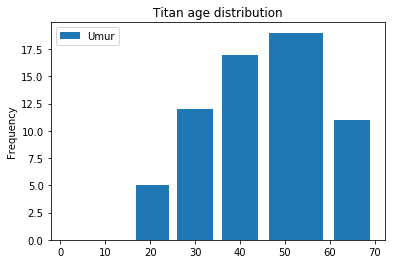

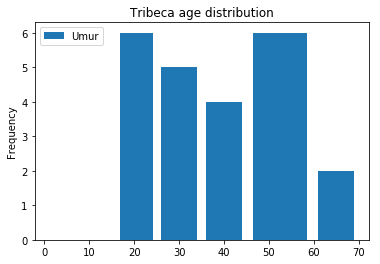

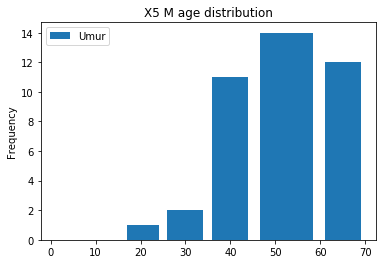

In [39]:
items = dat["Barang"]
for i in range(len(items)):
    item_age[item_age["Barang"]==items[i]].plot(kind='hist',bins=[0,12,16,25,35,45,60,70],rwidth=0.8)
    plt.title( items[i]+' age distribution')

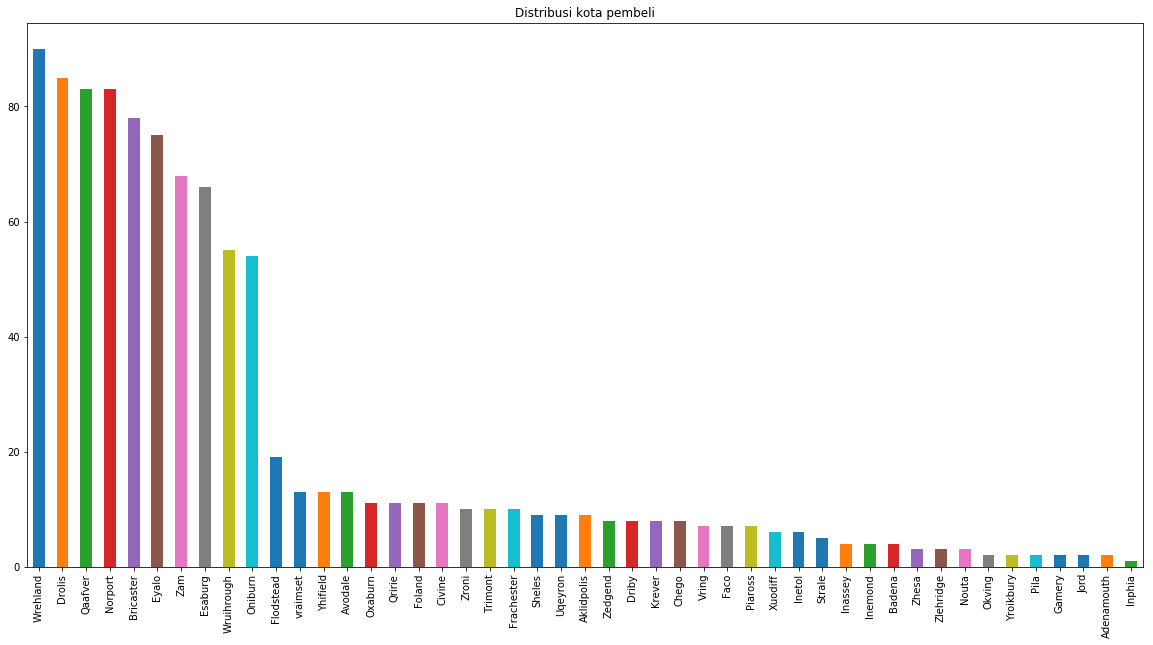

In [52]:
kota_count = df["kota"].value_counts()
kota_count.plot(kind='bar')
plt.title('Distribusi kota pembeli')
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 20
fig_size[1] = 10

In [57]:
#distribusi kota
print('distribusi asal kota pembeli')
df["kota"].value_counts()

distribusi asal kota pembeli


Wrehland      90
Drolis        85
Qaafver       83
Norport       83
Bricaster     78
Eyalo         75
Zam           68
Esaburg       66
Wruihrough    55
Oniburn       54
Flodstead     19
vraimset      13
Yhifield      13
Avodale       13
Oxaburn       11
Qririe        11
Foland        11
Civine        11
Zroni         10
Trimont       10
Frachester    10
Sheles         9
Uqeyron        9
Aklidpolis     9
Zedgend        8
Driby          8
Krever         8
Chego          8
Vring          7
Faco           7
Piaross        7
Xuodiff        6
Inetol         6
Strale         5
Inassey        4
Inemond        4
Badena         4
Zhesa          3
Zlehridge      3
Nouta          3
Okving         2
Yroikbury      2
Pila           2
Gamery         2
Jord           2
Adenamouth     2
Inphia         1
Name: kota, dtype: int64